In [10]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [2]:
word_embeddings = pickle.load(open("word_embeddings_subset.p","rb"))
len(word_embeddings)

243

In [7]:
def get_vector(word):
    return word_embeddings[word]

In [9]:
get_vector("country")

array([-0.08007812,  0.13378906,  0.14355469,  0.09472656, -0.04736328,
       -0.02355957, -0.00854492, -0.18652344,  0.04589844, -0.08154297,
       -0.03442383, -0.11621094,  0.21777344, -0.10351562, -0.06689453,
        0.15332031, -0.19335938,  0.26367188, -0.13671875, -0.05566406,
        0.07470703, -0.00070953,  0.09375   , -0.14453125,  0.04296875,
       -0.01916504, -0.22558594, -0.12695312, -0.0168457 ,  0.05224609,
        0.0625    , -0.1484375 , -0.01965332,  0.17578125,  0.10644531,
       -0.04760742, -0.10253906, -0.28515625,  0.10351562,  0.20800781,
       -0.07617188, -0.04345703,  0.08642578,  0.08740234,  0.11767578,
        0.20996094, -0.07275391,  0.1640625 , -0.01135254,  0.0025177 ,
        0.05810547, -0.03222656,  0.06884766,  0.046875  ,  0.10107422,
        0.02148438, -0.16210938,  0.07128906, -0.16210938,  0.05981445,
        0.05102539, -0.05566406,  0.06787109, -0.03759766,  0.04345703,
       -0.03173828, -0.03417969, -0.01116943,  0.06201172, -0.08

- Word embeddings are multidimensional arrays, usually with hundreds of attributes that pose a challenge for its interpretation.

### Word embedding of some words using a pair of attributes (2 and 3)

In [18]:
words = ['oil', 'gas', 'happy', 'sad', 'city', 'town', 'village', 'country', 'continent', 'petroleum', 'joyful']
vectors = np.array([get_vector(word) for word in words])

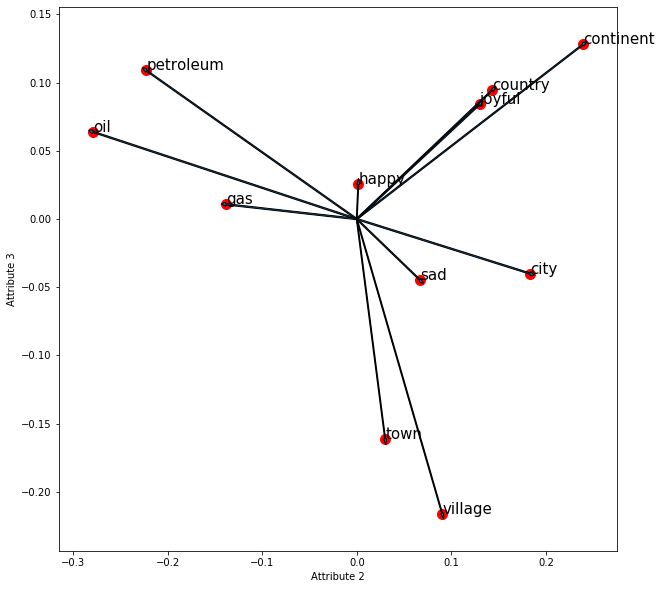

In [51]:
f, ax = plt.subplots(figsize=(10,10))

ax.scatter(vectors[:,2], vectors[:,3],s=100,c="r")

for i in vectors:
    ax.arrow(0,0,i[2], i[3])
    
for i in range(len(words)):
    ax.annotate(words[i], (vectors[i,2], vectors[i,3]), size=15)
    
plt.xlabel("Attribute 2")
plt.ylabel("Attribute 3")
plt.show()

### Word distances

In [52]:
words = ['sad', 'happy', 'town', 'village']
vectors = np.array([get_vector(word) for word in words])

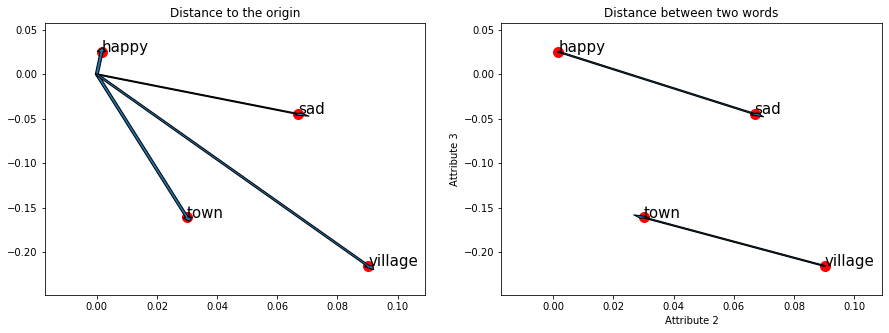

Distance between sad and happy: 0.09576884
Distance between town and village: 0.081407264


In [73]:
f, (ax1, ax2 )= plt.subplots(nrows=1, ncols=2, figsize=(15,5))

ax1.scatter(vectors[:,2], vectors[:,3],s=100,c="r")
ax2.scatter(vectors[:,2], vectors[:,3],s=100,c="r")

for i in vectors:
    ax1.arrow(0,0,i[2], i[3])
    
for i in range(len(words)):
    ax1.annotate(words[i], (vectors[i,2], vectors[i,3]), size=15)
    ax2.annotate(words[i], (vectors[i,2], vectors[i,3]), size=15)
    
diff_1 = vectors[0,2:4] - vectors[1,2:4] #between sad and happy
diff_2 = vectors[2,2:4] - vectors[3,2:4] #between town and village

ax2.arrow(vectors[3,2],vectors[3,3],diff_2[0],diff_2[1])
ax2.arrow(vectors[1,2],vectors[1,3],diff_1[0],diff_1[1])

ax1.set_title("Distance to the origin")
ax2.set_title("Distance between two words")

plt.xlabel("Attribute 2")
plt.ylabel("Attribute 3")
plt.show()

print("Distance between sad and happy:", np.linalg.norm(diff_1))
print("Distance between town and village:", np.linalg.norm(diff_2))

### Predicting capitals

In [126]:
capital = get_vector("Spain") - get_vector("Madrid")

In [127]:
country = get_vector("Paris") - capital

In [129]:
diff = country - get_vector("France")
print("The distance between the aproximation and the real vector is", np.linalg.norm(diff))

The distance between the aproximation and the real vector is 4.2131944


In [136]:
keys = word_embeddings.keys()
data = []
for key in keys:
    data.append(word_embeddings[key])
embedding = pd.DataFrame(data=data, index=keys)

In [139]:
embedding.iloc[5:15,:]

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
town,0.123535,0.159180,0.030029,-0.161133,0.015625,0.111816,0.039795,-0.196289,-0.039307,0.067871,...,-0.007935,-0.091797,-0.265625,0.029297,0.089844,-0.049805,-0.202148,-0.079590,0.068848,-0.164062
Canada,-0.136719,-0.154297,0.269531,0.273438,0.086914,-0.076172,-0.018677,0.006256,0.077637,-0.211914,...,0.105469,0.030762,-0.039307,0.183594,-0.117676,0.191406,0.074219,0.020996,0.285156,-0.257812
London,-0.267578,0.092773,-0.238281,0.115234,-0.006836,0.221680,-0.251953,-0.055420,0.020020,0.149414,...,-0.008667,-0.008484,-0.053223,0.197266,-0.296875,0.064453,0.091797,0.058350,0.022583,-0.101074
England,-0.198242,0.115234,0.062500,-0.058350,0.226562,0.045898,-0.062256,-0.202148,0.080566,0.021606,...,0.135742,0.109375,-0.121582,0.008545,-0.171875,0.086914,0.070312,0.003281,0.069336,0.056152
Australia,0.048828,-0.194336,-0.041504,0.084473,-0.114258,-0.208008,-0.164062,-0.269531,0.079102,0.275391,...,0.021118,0.171875,0.042236,0.221680,-0.239258,-0.106934,0.030884,0.006622,0.051270,-0.135742
Japan,0.050781,0.250000,0.166992,0.084473,-0.265625,-0.077148,-0.039551,-0.298828,0.080566,0.094238,...,0.080566,0.099609,0.053955,0.042725,-0.138672,-0.242188,-0.291016,0.133789,0.005829,0.023926
Pakistan,-0.308594,0.029175,0.185547,0.177734,-0.343750,0.125977,-0.078613,-0.121094,-0.205078,-0.064453,...,0.033936,0.149414,0.031982,-0.117188,-0.248047,-0.019287,-0.029663,0.019653,0.039551,-0.015320
Iran,-0.126953,0.165039,0.213867,0.324219,0.044678,-0.036865,-0.155273,-0.167969,-0.228516,0.184570,...,0.246094,0.023315,0.005035,-0.075195,0.166992,0.045166,0.044678,-0.027344,0.063965,0.156250
gas,-0.161133,0.105469,-0.138672,0.010803,0.017090,-0.041504,-0.145508,-0.341797,-0.028564,0.184570,...,-0.111328,-0.218750,-0.203125,0.140625,-0.041992,0.026611,0.120605,0.255859,0.202148,-0.019287
happy,-0.000519,0.160156,0.001610,0.025391,0.099121,-0.085938,0.324219,-0.021729,0.134766,0.110352,...,-0.109863,0.107910,-0.070312,-0.127930,-0.050781,0.042725,-0.073242,-0.035400,0.088867,-0.302734


In [130]:
def find_closest(aprox):
    
    norms = []
    
    for row in range(len(embedding)):
        vector = embedding.iloc[row,:].to_numpy() - aprox
        norms.append(np.linalg.norm(vector))
    idx_nearest = norms.index(min(norms))
    
    return embedding.iloc[idx_nearest].name

In [150]:
print(find_closest(get_vector('Berlin') + capital))
print(find_closest(get_vector('Beijing') + capital))

Germany
China


### Not always works

In [151]:
print(find_closest(get_vector('Lisbon') + capital))

Lisbon


### Getting the nearest word for a entire sentence

In [148]:
doc = "Spain petroleum city king"
vectors_doc = [get_vector(x) for x in doc.split(" ")]
vector = np.sum(vectors_doc, axis = 0)

In [149]:
find_closest(vector)

'petroleum'